<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/R%20for%20Beginners/eda_dlookr_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# **Data Exploration with dlookr  in R**



## Introduction

The dlookr is a collection of tools that support data diagnosis, exploration, and transformation. Data diagnostics provides information and visualization of missing values and outliers and unique and negative values to help you understand the distribution and quality of your data. Data exploration provides information and visualization of the descriptive statistics of univariate variables, normality tests and outliers, correlation of two variables, and relationship between target variable and predictor. Data transformation supports binning for categorizing continuous variables, imputates missing values and outliers, resolving skewness. And it creates automated reports that support these three tasks.

![alt text](http://drive.google.com/uc?export=view&id=1BAJhW1KhwapiGMgf6m7hdIife2uD-BRr)



### Features:

-   Diagnose data quality.

-   Find appropriate scenarios to pursuit the follow-up analysis through data exploration and understanding.

-   Derive new variables or perform variable transformations.

-   Automatically generate reports for the above three tasks.

-   Supports quality diagnosis and EDA of table of DBMS

### Usage

-   Data quality diagnosis for data.frame, tbl_df, and table of DBMS

-   Exploratory Data Analysis for data.frame, tbl_df, and table of DBMS

-   Data Transformation

-   Data diagnosis and EDA for table of DBMS


## Install rpy2
Easy way to run R in Colab with Python runtime using rpy2 python package. We have to install this package using the `pip` command:

In [ ]:
!pip uninstall rpy2 -y
! pip install rpy2==3.5.1
%load_ext rpy2.ipython

##  Mount Google Drive

Then you must create a folder in Goole drive named "R" to install all packages permanently. Before installing R-package in Python runtime. You have to mount Google Drive and follow on-screen instruction:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check and Install Required R Packages

In [ ]:
%%R
pkg <- c('tidyverse',
         'devtools'
         )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

## Install dlookr

In [ ]:
!sudo apt install cmake
!sudo apt install libcairo2-dev
!sudo apt install libgmp-dev
!sudo apt-get install libmpfr-dev

In [ ]:
%%R
install.packages(c("nloptr", "lme4", "jomo", "mitml", 'mice'),lib='drive/My Drive/R/')
devtools::install_github("choonghyunryu/dlookr", lib='drive/My Drive/R/')

## Load Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(dlookr)

## Data

The data set use in this exercise can be downloaded from my [Dropbox](https://www.dropbox.com/scl/fo/fohioij7h503duitpl040/h?rlkey=3voumajiklwhgqw75fe8kby3o&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/R_Beginners) account.

We will use `read_csv()` function of `readr` package to import data as a `tidy` data.

In [ ]:
%%R
mf<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/R_Beginners/gp_soil_data_na.csv")
as_df<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/R_Beginners/rice_arsenic_data.csv")


Rows: 471 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 140 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): TREAT, VAR
dbl (11): ID, TREAT_ID, PH, TN, PN, ster, DTM, GY, SW, GAs, STAs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Quality Diagnosis

#### General diagnosis of all variables

Data Quality Diagnosis is the first step before any statistical analysis. We use `diagnose()` function of **dlookr** package to do general General diagnosis of all variables.

The variables of the `tbl_df` object returned by `diagnose ()` are as follows:

-   variables : variable names

-   types : the data type of the variables

-   missing_count : number of missing values

-   missing_percent : percentage of missing values

-   unique_count : number of unique values

-   unique_rate : rate of unique value. unique_count / number of observation

In [ ]:
%%R
dlookr::diagnose(mf)

# A tibble: 19 × 6
   variables types     missing_count missing_percent unique_count unique_rate
   <chr>     <chr>             <int>           <dbl>        <int>       <dbl>
 1 ID        numeric               0           0              471     1      
 2 FIPS      numeric               0           0              172     0.365  
 3 STATE_ID  numeric               0           0                4     0.00849
 4 STATE     character             0           0                4     0.00849
 5 COUNTY    character             0           0              161     0.342  
 6 Longitude numeric               0           0              471     1      
 7 Latitude  numeric               0           0              471     1      
 8 SOC       numeric               4           0.849          457     0.970  
 9 DEM       numeric               0           0              464     0.985  
10 Aspect    numeric               0           0              464     0.985  
11 Slope     numeric               0         

Missing Value(NA) : Variables with many missing values, i.e. those with a missing_percent close to 100, should be excluded from the analysis.

Unique value : Variables with a unique value (unique_count = 1) are considered to be excluded from data analysis. And if the data type is not numeric (integer, numeric) and the number of unique values is equal to the number of observations (unique_rate = 1), then the variable is likely to be an identifier. Therefore, this variable is also not suitable for the analysis model.

#### Diagnosis of Numeric Variables

We may use `diagnose_numeric()`, diagnoses numeric(continuous and discrete) variables in a data frame returns more diagnostic information such as:

-   min : minimum value

-   Q1 : 1/4 quartile, 25th percentile

-   mean : arithmetic mean

-   median : median, 50th percentile

-   Q3 : 3/4 quartile, 75th percentile

-   max : maximum value

-   zero : number of observations with a value of 0

-   minus : number of observations with negative numbers

-   outlier : number of outliers

In [ ]:
%%R
# First select  numerical columns
mf |>
  dplyr::select(SOC, DEM, Slope, Aspect, TPI, KFactor, MAP, MAT, NDVI, SiltClay)  |>
# then diagnose them
  dlookr::diagnose_numeric()

# A tibble: 10 × 10
   variables      min       Q1        mean    median      Q3     max  zero minus
   <chr>        <dbl>    <dbl>       <dbl>     <dbl>   <dbl>   <dbl> <int> <int>
 1 SOC         0.408     2.77     6.35        4.97   8.71e+0 3.05e+1     0     0
 2 DEM       259.     1175.    1631.       1593.     2.23e+3 3.62e+3     0     0
 3 Slope       0.649     1.45     4.83        2.73   7.11e+0 2.61e+1     0     0
 4 Aspect     86.9     149.     165.        164.     1.79e+2 2.56e+2     0     0
 5 TPI       -26.7      -0.816   -0.000669   -0.0476 8.49e-1 1.67e+1     0   241
 6 KFactor     0.0500    0.193    0.256       0.280  3.20e-1 4.30e-1     0     0
 7 MAP       194.      353.     499.        433.     5.90e+2 1.13e+3     0     0
 8 MAT        -0.591     5.88     8.89        9.17   1.24e+1 1.69e+1     0     6
 9 NDVI        0.142     0.305    0.435       0.416  5.56e-1 7.97e-1     0     0
10 SiltClay    9.16     42.8     53.7        52.1    6.29e+1 8.98e+1     0     0
# ℹ 1 mo

#### Diagnosis of Categorical Variables

`diagnose_category()` diagnoses the categorical(factor, ordered, character) variables of a data frame. The usage is similar to diagnose() but returns more diagnostic information such as:

-   variables : variable names

-   levels: level names

-   N : number of observation

-   freq : number of observation at the levels

-   ratio : percentage of observation at the levels

-   rank : rank of occupancy ratio of levels

In [ ]:
%%R
mf  |>
# Select categorical variables
  dplyr::select(STATE, NLCD,FRG)  |>
# then diagnose them
  dlookr::diagnose_category()

# A tibble: 14 × 6
   variables levels                    N  freq ratio  rank
   <chr>     <chr>                 <int> <int> <dbl> <int>
 1 STATE     Colorado                471   136 28.9      1
 2 STATE     Wyoming                 471   120 25.5      2
 3 STATE     New Mexico              471   109 23.1      3
 4 STATE     Kansas                  471   106 22.5      4
 5 NLCD      Herbaceous              471   151 32.1      1
 6 NLCD      Shrubland               471   130 27.6      2
 7 NLCD      Planted/Cultivated      471    97 20.6      3
 8 NLCD      Forest                  471    93 19.7      4
 9 FRG       Fire Regime Group II    471   252 53.5      1
10 FRG       Fire Regime Group III   471   100 21.2      2
11 FRG       Fire Regime Group IV    471    75 15.9      3
12 FRG       Fire Regime Group I     471    19  4.03     4
13 FRG       Fire Regime Group V     471    18  3.82     5
14 FRG       Indeterminate FRG       471     7  1.49     6


### Diagnosing Outliers

`diagnose_outlier()` diagnoses the outliers of the numeric (continuous and discrete) variables of the data frame.

-   outliers_cnt : number of outliers

-   outliers_ratio : percent of outliers

-   outliers_mean : arithmetic average of outliers

-   with_mean : arithmetic average of with outliers

-   without_mean : arithmetic average of without outliers

The `diagnose_outlier()` produces outlier information for diagnosing the quality of the numerical data.

In [ ]:
%%R
mf  |>
  dlookr::diagnose_outlier(SOC, DEM, SOC, Slope,
                           Aspect, TPI, KFactor, MAP, MAT, NDVI, SiltClay)

# A tibble: 10 × 6
   variables outliers_cnt outliers_ratio outliers_mean   with_mean without_mean
   <chr>            <int>          <dbl>         <dbl>       <dbl>        <dbl>
 1 SOC                 20          4.25         21.1      6.35           5.69  
 2 DEM                  0          0           NaN     1631.          1631.    
 3 Slope               20          4.25         18.9      4.83           4.20  
 4 Aspect               8          1.70        224.     165.           164.    
 5 TPI                 85         18.0           0.291   -0.000669      -0.0649
 6 KFactor              0          0           NaN        0.256          0.256 
 7 MAP                 17          3.61       1049.     499.           479.    
 8 MAT                  0          0           NaN        8.89           8.89  
 9 NDVI                 0          0           NaN        0.435          0.435 
10 SiltClay             3          0.637         9.71    53.7           54.0   


### Visualization of Outliers

`plot_outlier()` visualizes outliers of numerical variables(continuous and discrete) of data.frame. Usage is the same diagnose().

The plot derived from the numerical data diagnosis is as follows.

-   With outliers box plot

-   Without outliers box plot

-   With outliers histogram

-   Without outliers histogram

The following example uses `plot_outlier()` after `diagnose_outlier()`, and `filter` and `select` functions with **dplyr** packages to visualize this with an outlier ratio of 0.5% or higher.


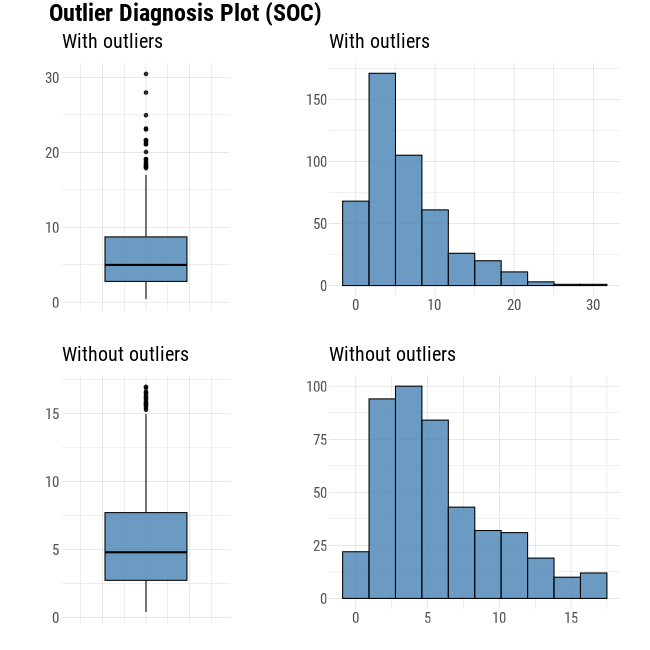

In [ ]:
%%R -w 650 -h 650 -u px
mf  |>
  dlookr::plot_outlier(dlookr::diagnose_outlier(mf,SOC) |>
                 dplyr::filter(outliers_ratio >= 0.5)  |>
                 dplyr::select(variables)  |>
                 unlist())


## Daignosis Normality


### Normality Test

`normality()` function of **dlookr** performs a normality test on multiple numerical data. Shapiro-Wilk normality test is performed. When the number of observations is greater than 5000, it is tested after extracting 5000 samples by random simple sampling.

The variables of tbl_df object returned by normality() are as follows.

-   statistic : Statistics of the Shapiro-Wilk test

-   p_value : p-value of the Shapiro-Wilk test

-   sample : Number of sample observations performed Shapiro-Wilk test

In [ ]:
%%R
mf  |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI)  |>
  dlookr::normality()  |>
  # sort variables that do not follow a normal distribution in order of p_value:
  dplyr::filter(p_value <= 0.01)  |>
  dplyr::arrange(abs(p_value))

# A tibble: 5 × 4
  vars  statistic  p_value sample
  <chr>     <dbl>    <dbl>  <dbl>
1 SOC       0.872 3.91e-19    471
2 MAP       0.897 2.88e-17    471
3 NDVI      0.970 2.91e- 8    471
4 DEM       0.973 1.33e- 7    471
5 MAT       0.973 1.42e- 7    471


The `normality()` function supports the `group_by()` function syntax in the **dplyr** package.

In [ ]:
%%R
mf %>%
  dplyr::group_by(NLCD)  |>
  dlookr::normality(SOC)  |>
  dplyr:: arrange(desc(p_value))

# A tibble: 4 × 5
  variable NLCD               statistic  p_value sample
  <chr>    <chr>                  <dbl>    <dbl>  <dbl>
1 SOC      Planted/Cultivated     0.969 2.29e- 2     97
2 SOC      Forest                 0.926 5.87e- 5     93
3 SOC      Herbaceous             0.889 3.42e- 9    151
4 SOC      Shrubland              0.821 3.81e-11    130


### Visualization of Normality

We may also use `plot_normality()` function of **dlookr** package to visualizes the normality of numeric data. The information that `plot_normality()` visualizes is as follows.

-   Histogram of original data

-   Q-Q plot of original data

-   histogram of log transformed data

-   Histogram of square root transformed data

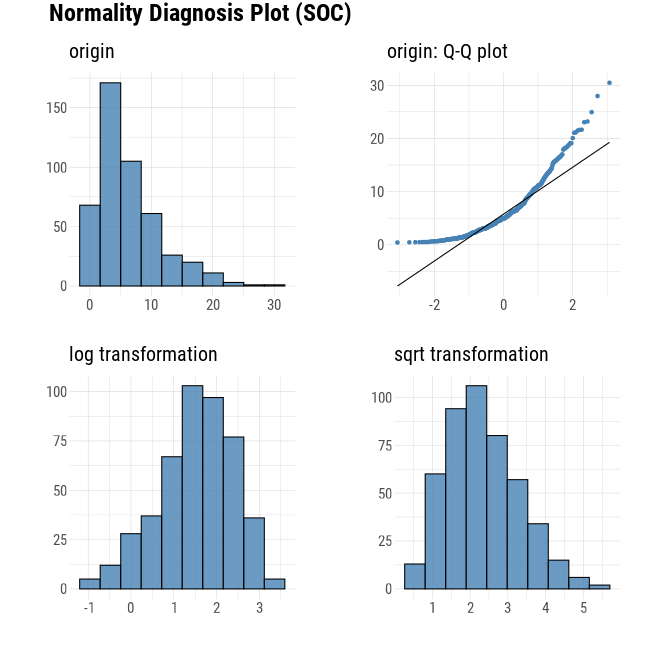

In [ ]:
%%R -w 650 -h 650 -u px
mf |>  dlookr::plot_normality(SOC)

## Descriptive Statistics

The `describe()` function from **dloookr** package computes descriptive statistics for numerical data. The descriptive statistics help determine the distribution of numerical variables.

The variables of the `tbl_df` object returned by `describe()` are as follows.

-   n : number of observations excluding missing values

-   na : number of missing values

-   mean : arithmetic average

-   sd : standard deviation

-   se_mean : standard error mean. sd/sqrt(n)

-   IQR : interquartile range (Q3-Q1)

-   skewness : skewness

-   kurtosis : kurtosis

-   p25 : Q1. 25% percentile

-   p50 : median. 50% percentile

-   p75 : Q3. 75% percentile

-   p01, p05, p10, p20, p30 : 1%, 5%, 20%, 30% percentiles

-   p40, p60, p70, p80 : 40%, 60%, 70%, 80% percentiles

-   p90, p95, p99, p100 : 90%, 95%, 99%, 100% percentiles

In [ ]:
%%R
des.stata<-mf  |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI) |>
 # then descrive them
  dlookr::describe()
print(des.stata)

# A tibble: 5 × 26
  described_variables     n    na     mean      sd  se_mean      IQR skewness
  <chr>               <int> <int>    <dbl>   <dbl>    <dbl>    <dbl>    <dbl>
1 SOC                   467     4    6.35    5.05   0.233      5.94    1.46  
2 DEM                   471     0 1631.    768.    35.4     1059.     -0.0235
3 MAP                   471     0  499.    207.     9.54     238.      1.08  
4 MAT                   471     0    8.89    4.10   0.189      6.56   -0.275 
5 NDVI                  471     0    0.435   0.162  0.00747    0.251   0.234 
# ℹ 18 more variables: kurtosis <dbl>, p00 <dbl>, p01 <dbl>, p05 <dbl>,
#   p10 <dbl>, p20 <dbl>, p25 <dbl>, p30 <dbl>, p40 <dbl>, p50 <dbl>,
#   p60 <dbl>, p70 <dbl>, p75 <dbl>, p80 <dbl>, p90 <dbl>, p95 <dbl>,
#   p99 <dbl>, p100 <dbl>


The `describe()` function supports the `group_by()` function syntax of the **dplyr** package. Following function calculate descriptive testatrices of SOC and NDVI of different NLCD

In [ ]:
%%R
mf %>%
  group_by(NLCD) |>
  dlookr::describe(SOC, NDVI)

# A tibble: 8 × 27
  described_variables NLCD          n    na   mean    sd se_mean    IQR skewness
  <chr>               <chr>     <int> <int>  <dbl> <dbl>   <dbl>  <dbl>    <dbl>
1 NDVI                Forest       93     0  0.571 0.116  0.0120  0.117   -0.672
2 NDVI                Herbaceo…   151     0  0.400 0.131  0.0106  0.126    0.976
3 NDVI                Planted/…    97     0  0.533 0.121  0.0123  0.137    0.518
4 NDVI                Shrubland   130     0  0.307 0.130  0.0114  0.169    1.12 
5 SOC                 Forest       93     0 10.4   6.80   0.705  10.4      0.778
6 SOC                 Herbaceo…   150     1  5.48  3.93   0.320   4.34     1.28 
7 SOC                 Planted/…    97     0  6.70  3.60   0.365   5.42     0.535
8 SOC                 Shrubland   127     3  4.13  3.74   0.332   4.31     1.71 
# ℹ 18 more variables: kurtosis <dbl>, p00 <dbl>, p01 <dbl>, p05 <dbl>,
#   p10 <dbl>, p20 <dbl>, p25 <dbl>, p30 <dbl>, p40 <dbl>, p50 <dbl>,
#   p60 <dbl>, p70 <dbl>, p75

## Correlation Analysis

`correlate()` calculates the correlation coefficient of all combinations of several numerical variables as follows:

In [ ]:
%%R
# First select  numerical columns
mf  |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI) |>
# then diagnose them
  dlookr::correlate()

# A tibble: 20 × 3
   var1  var2  coef_corr
   <fct> <fct>     <dbl>
 1 DEM   SOC      0.167 
 2 MAP   SOC      0.499 
 3 MAT   SOC     -0.358 
 4 NDVI  SOC      0.587 
 5 SOC   DEM      0.167 
 6 MAP   DEM     -0.307 
 7 MAT   DEM     -0.808 
 8 NDVI  DEM     -0.0673
 9 SOC   MAP      0.499 
10 DEM   MAP     -0.307 
11 MAT   MAP      0.0603
12 NDVI  MAP      0.805 
13 SOC   MAT     -0.358 
14 DEM   MAT     -0.808 
15 MAP   MAT      0.0603
16 NDVI  MAT     -0.210 
17 SOC   NDVI     0.587 
18 DEM   NDVI    -0.0673
19 MAP   NDVI     0.805 
20 MAT   NDVI    -0.210 


The `correlate()` also supports the `group_by()` function syntax in the **dplyr** package.

In [ ]:
%%R
mf %>%
  group_by(NLCD)  |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI)  |>
# then diagnose them
  dlookr::correlate()

Adding missing grouping variables: `NLCD`
# A tibble: 80 × 4
   NLCD   var1  var2  coef_corr
   <chr>  <fct> <fct>     <dbl>
 1 Forest DEM   SOC       0.303
 2 Forest MAP   SOC       0.481
 3 Forest MAT   SOC      -0.463
 4 Forest NDVI  SOC       0.391
 5 Forest SOC   DEM       0.303
 6 Forest MAP   DEM       0.411
 7 Forest MAT   DEM      -0.717
 8 Forest NDVI  DEM       0.397
 9 Forest SOC   MAP       0.481
10 Forest DEM   MAP       0.411
# ℹ 70 more rows
# ℹ Use `print(n = ...)` to see more rows


### Visualization of the Correlation Matrix

`plot.correlate()` visualizes the correlation matrix.

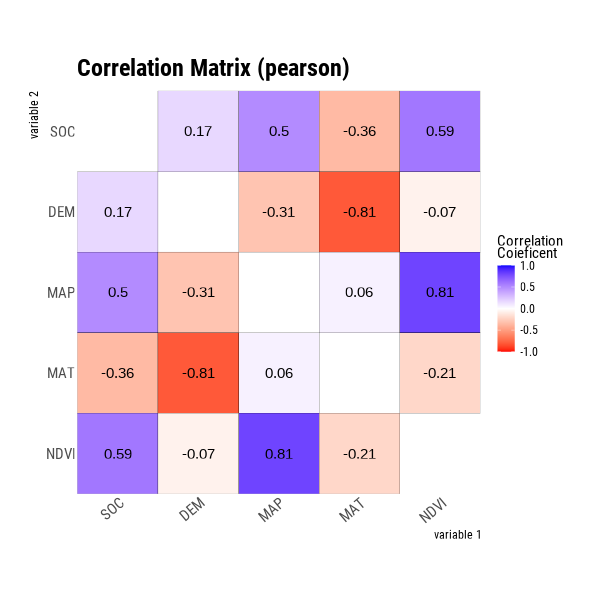

In [ ]:
%%R -w 600 -h 600 -u px
mf |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI) |>
  # then diagnose them
  dlookr::correlate() |>
  plot()

The `plot.correlate()` function also supports the `group_by()` function syntax in the **dplyr** package.


Adding missing grouping variables: `NLCD`


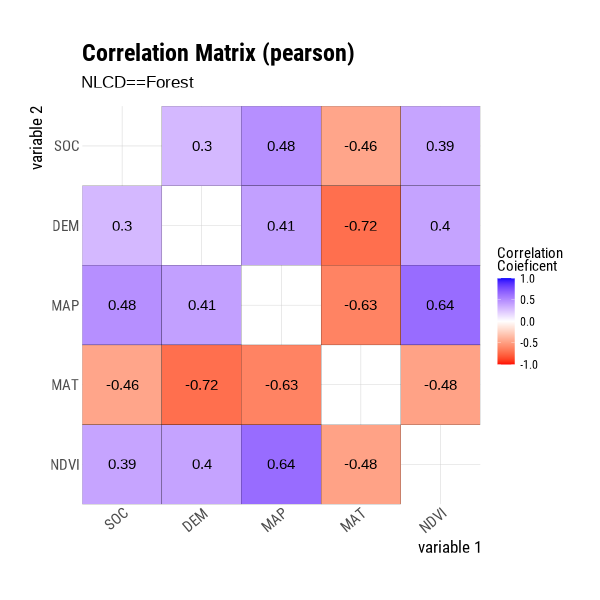

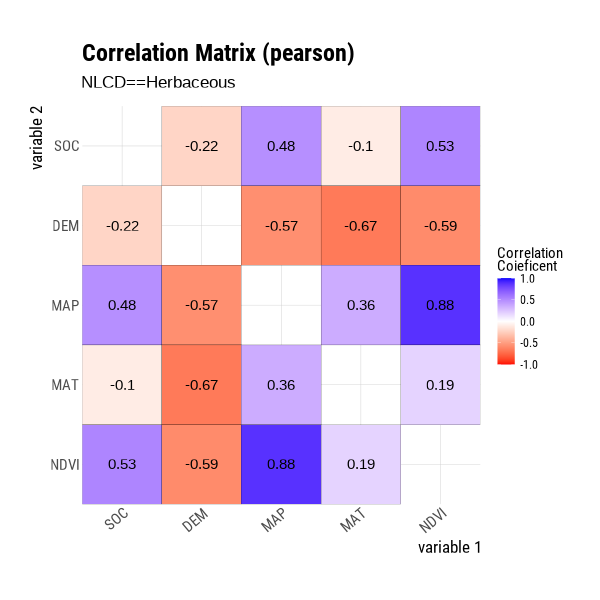

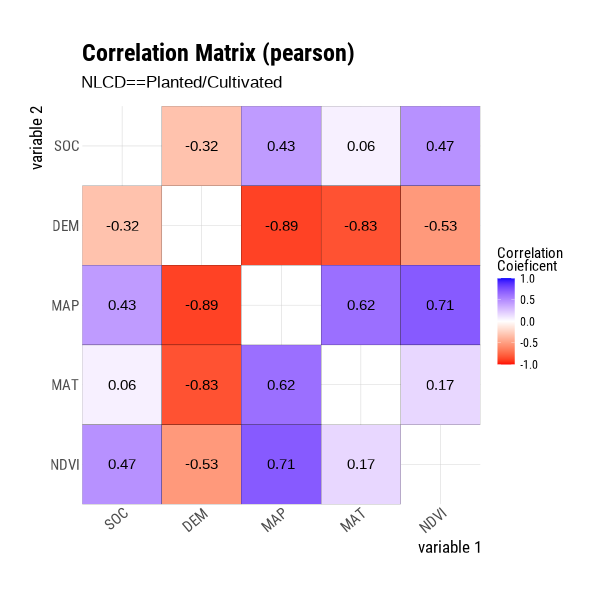

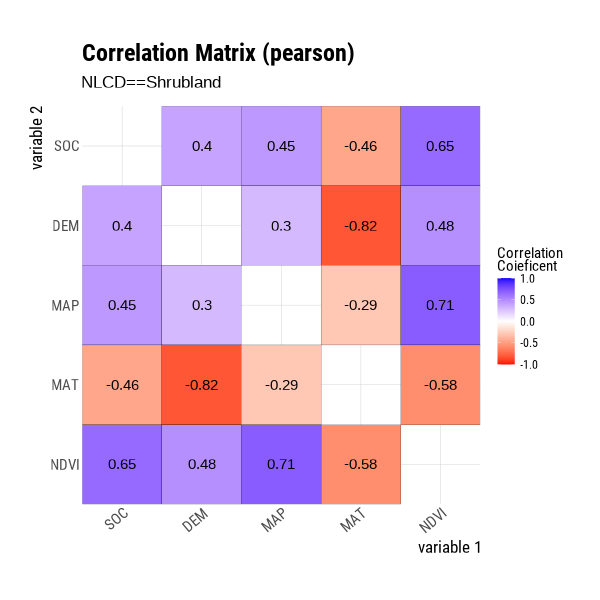

In [ ]:
%%R -w 600 -h 600 -u px

mf |>
  group_by(NLCD) %>%
  dplyr::select(SOC, DEM, MAP, MAT, NDVI) |>
# then diagnose them
  dlookr::correlate() |>
  plot()

## EDA based on target variable

To perform EDA based on the target variable, you must create a target_by class object. `target_by()` creates a target_by class with an object inheriting data.frame.. `target_by()` is similar to `group_by()` in dplyr which creates grouped_df.



### EDA when target variable is categorical variable

The following is an example of specifying **VAR** as the target variable in **as_df** data.frame.:

In [ ]:
%%R
target.cat<-target_by(as_df, VAR)

#### Cases where predictors are numeric variable:

`relate()` shows the relationship between the target variable and the predictor. The following example shows the relationship between **GAs** and the target variable VAR. The predictor GAs is a numeric variable. In this case, the descriptive statistics are shown for each level of the target variable.

In [ ]:
%%R
# If the variable of interest is a numerical variable
cat_num <- relate(target.cat, GAs)
cat_num

# A tibble: 8 × 27
  described_variables VAR           n    na  mean    sd se_mean   IQR skewness
  <chr>               <chr>     <int> <int> <dbl> <dbl>   <dbl> <dbl>    <dbl>
1 GAs                 BR01         20     0  1.41 0.485  0.108  0.671   0.387 
2 GAs                 BR06         20     0  1.27 0.484  0.108  0.603   0.619 
3 GAs                 BR28         20     0  1.35 0.516  0.115  0.737   0.278 
4 GAs                 BR35         20     0  1.37 0.454  0.101  0.763   0.194 
5 GAs                 BR36         20     0  1.37 0.526  0.118  0.860   0.476 
6 GAs                 Jefferson    20     0  1.32 0.478  0.107  0.620   0.624 
7 GAs                 Kaybonnet    20     0  1.43 0.546  0.122  0.895   0.0240
8 GAs                 total       140     0  1.36 0.491  0.0415 0.798   0.345 
# ℹ 18 more variables: kurtosis <dbl>, p00 <dbl>, p01 <dbl>, p05 <dbl>,
#   p10 <dbl>, p20 <dbl>, p25 <dbl>, p30 <dbl>, p40 <dbl>, p50 <dbl>,
#   p60 <dbl>, p70 <dbl>, p75 <dbl>, p80 <dbl>, p

`plot()` visualizes the `relate` class object created by `relate()` as the relationship between the target and predictor variables. The relationship between **GAs** and **VAR** visualized by a density plot.

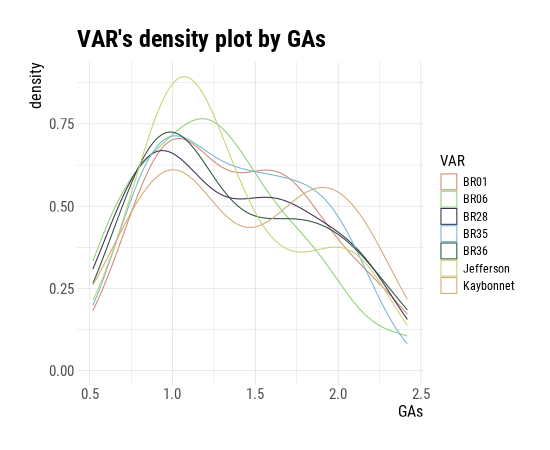

In [ ]:
%%R -w 550 -h 450 -u px
plot(cat_num)

#### Cases where predictors are categorical variable:

The following example shows the relationship between `TREAT` and the target variable `VAR`. The predictor variable `TREAT` is categorical. This case illustrates the `contingency table` of two variables. The `summary()` function performs an `independence test` on the contingency table.

In [ ]:
%%R
cat_cat <- relate(target.cat, TREAT)
summary(cat_cat)

Call: xtabs(formula = formula_str, data = data, addNA = TRUE)
Number of cases in table: 140 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 0, df = 6, p-value = 1


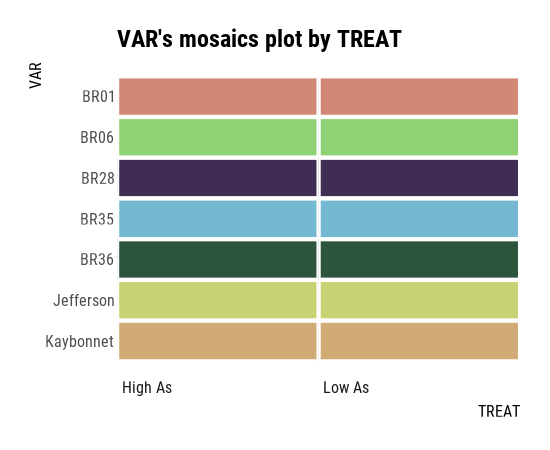

In [ ]:
%%R -w 550 -h 450 -u px
plot(cat_cat)

### EDA when target variable is numerical variable

When the numeric variable GY is the target variable, we examine the relationship between the target variable and the predictor.

In [ ]:
%%R
#| error: false
target.num <- target_by(as_df, GY)


#### Cases where predictors are numeric variable:

The following example shows the relationship between GAs and the target variable GY. The predictor variable GAs is numeric. In this case, it shows the result of a simple linear model of the target \~ predictor formula. The 'summary()' function expresses the details of the model.

In [ ]:
%%R
num_num <- relate(target.num, GAs)
summary(num_num)


Call:
lm(formula = formula_str, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.308  -5.749  -0.707   6.801  34.242 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   50.983      2.697  18.901  < 2e-16 ***
GAs          -16.410      1.866  -8.792 5.23e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.8 on 138 degrees of freedom
Multiple R-squared:  0.3591,	Adjusted R-squared:  0.3544 
F-statistic: 77.31 on 1 and 138 DF,  p-value: 5.235e-15



`plot()` visualizes the relationship between the target and predictor variables. The relationship between GY and GAs is visualized with a scatter plot. The figure on the left shows the scatter plot of GY and GAs and the confidence interval of the regression line and regression line. The figure on the right shows the relationship between the original data and the predicted values of the linear model as a scatter plot. If there is a linear relationship between the two variables, the scatter plot of the observations converges on the red diagonal line.

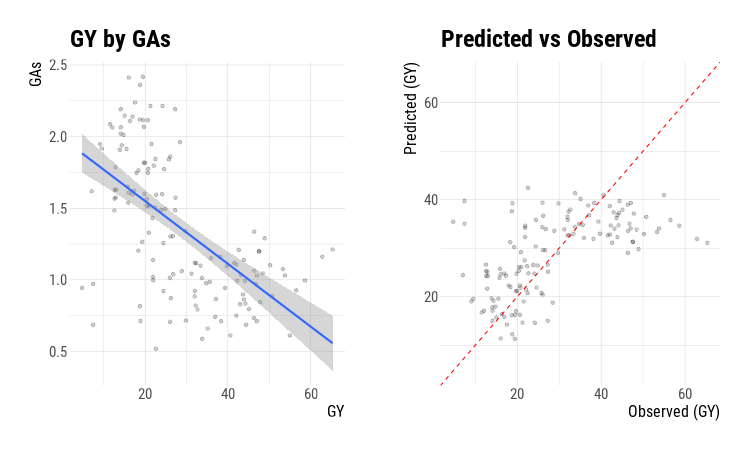

In [ ]:
%%R -w 750 -h 450 -u px
plot(num_num)

#### Cases where predictors are categorical variables:

The following example shows the relationship between **VAR** and the target  The predictor **VAR** is a categorical variable and displays the result of a one-way ANOVA of the target \~ predictor relationship. The results are expressed in terms of ANOVA. The `summary()` function shows the regression coefficients for each level of the predictor. In other words, it shows detailed information about the simple regression analysis of the target \~ predictor relationship.

In [ ]:
%%R
num_cat <- relate(target.num, VAR)
summary(num_cat)

## Data Transformation

**dlookr** imputes missing values and outliers and resolves skewed data. It also provides the ability to bin continuous variables as categorical variables.

Here is a list of the data conversion functions and functions provided by dlookr:

-   `find_na()` finds a variable that contains the missing values variable, and `imputate_na()` imputes the missing values.

-   `find_outliers()` finds a variable that contains the outliers, and `imputate_outlier()` imputes the outlier.

-   `summary.imputation()` and `plot.imputation()` provide information and visualization of the imputed variables.

-   `find_skewness()` finds the variables of the skewed data, and `transform()` performs the resolving of the skewed data.

-   `transform()` also performs standardization of numeric variables.

-   `summary.transform()` and `plot.transform()` provide information and visualization of transformed variables.

-   `binning()` and `binning_by()` convert binational data into categorical data.

-   `print.bins()` and `summary.bins()` show and summarize the binning results.

-   `plot.bins()` and `plot.optimal_bins()` provide visualization of the binning result.

-   `transformation_report()` performs the data transform and reports the result.

### Imputation of missing values

#### imputes the missing value with `imputate_na()`

`imputate_na()` imputes the missing value contained in the variable. The predictor with missing values supports both numeric and categorical variables and supports the following `method`.

-   predictor is numerical variable

    -   “mean”: arithmetic mean

    -   “median”: median

    -   “mode”: mode

    -   “knn”: K-nearest neighbors

        -   target variable must be specified

    -   “rpart”: Recursive Partitioning and Regression Trees

        -   target variable must be specified

    -   “mice”: Multivariate Imputation by Chained Equations

        -   target variable must be specified

        -   random seed must be set

-   predictor is categorical variable

    -   “mode”: mode

    -   “rpart”: Recursive Partitioning and Regression Trees

        -   target variable must be specified

    -   “mice”: Multivariate Imputation by Chained Equations

        -   target variable must be specified

        -   random seed must be set

In the following example, `imputate_na()` imputes the missing value of `SOC`, a numeric variable of **mf** dataframe, using the “rpart” method. `summary()` summarizes missing value imputation information, and `plot()` visualizes missing information.

In [ ]:
%%R
soc <- imputate_na(mf, SOC, STATE, method = "rpart")
summary(soc)

* Impute missing values based on Recursive Partitioning and Regression Trees
 - method : rpart

* Information of Imputation (before vs after)
                    Original    Imputation 
described_variables "value"     "value"    
n                   "467"       "471"      
na                  "4"         "0"        
mean                "6.350762"  "6.327249" 
sd                  "5.045409"  "5.031445" 
se_mean             "0.2334737" "0.2318367"
IQR                 "5.9440"    "5.8595"   
skewness            "1.464728"  "1.476371" 
kurtosis            "2.427192"  "2.469712" 
p00                 "0.408"     "0.408"    
p01                 "0.49094"   "0.49130"  
p05                 "0.9637"    "0.9735"   
p10                 "1.2902"    "1.2930"   
p20                 "2.3294"    "2.3350"   
p25                 "2.7695"    "2.7775"   
p30                 "3.1114"    "3.0940"   
p40                 "3.9906"    "3.9740"   
p50                 "4.971"     "4.953"    
p60                 "6

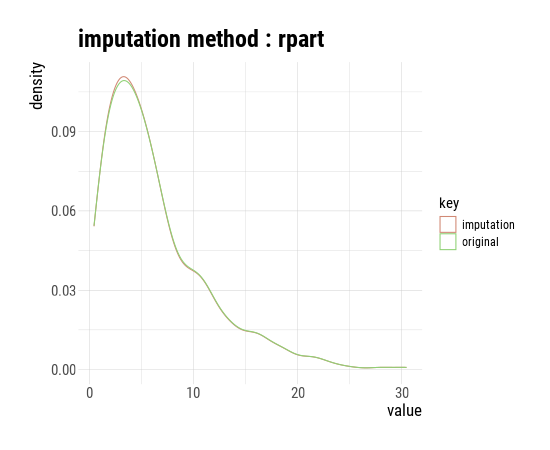

In [ ]:
%%R -w 550 -h 450 -u px
plot(soc)

### Standardization and Resolving Skewness

#### Introduction to the use of `transform()`

`transform()` performs data transformation. Only numeric variables are supported, and the following methods are provided.

-   Standardization

    -   “zscore”: z-score transformation. (x - mu) / sigma

    -   “minmax”: minmax transformation. (x - min) / (max - min)

-   Resolving Skewness

    -   “log”: log transformation. log(x)

    -   “log+1”: log transformation. log(x + 1). Used for values that contain 0.

    -   “sqrt”: square root transformation.

    -   “1/x”: 1 / x transformation

    -   “x\^2”: x square transformation

    -   “x\^3”: x\^3 square transformation

#### Standardization with transform()

Use the methods `zscore` and `minmax` to perform standardization.

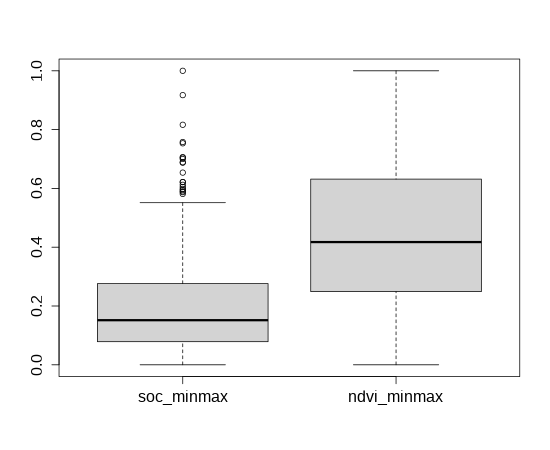

In [ ]:
%%R -w 550 -h 450 -u px
mf |>
  dplyr::mutate(soc_minmax = transform(SOC, method = "minmax"),
  ndvi_minmax = transform(NDVI, method = "minmax")) |>
  select(soc_minmax, ndvi_minmax) |>
  boxplot()

### Resolving Skewness data with `transform()`

`find_skewness()` searches for variables with skewed data. This function finds data skewed by search conditions and calculates skewness.

In [ ]:
%%R
dlookr::find_skewness(mf)

[1]  6  8 10 11 12 13 14


In [ ]:
%%R
# compute the skewness
find_skewness(mf, value = TRUE)

       ID      FIPS  STATE_ID Longitude  Latitude       SOC       DEM    Aspect 
   -0.008     0.326     0.327     0.750    -0.112     1.460    -0.023     0.533 
    Slope       TPI   KFactor       MAP       MAT      NDVI  SiltClay 
    1.627    -1.084    -0.540     1.079    -0.274     0.233     0.110 


skewness of SOC is 1.46. This means that the distribution of data is inclined to the left. So, for normal distribution, use `transform()` to convert to the “log” method as follows. `summary()` summarizes transformation information, and plot() visualizes transformation information.

In [ ]:
%%R
soc_log = transform(mf$SOC, method = "log")
summary(soc_log)

* Resolving Skewness with log

* Information of Transformation (before vs after)
            Original Transformation
n        467.0000000   467.00000000
na         4.0000000     4.00000000
mean       6.3507623     1.51955339
sd         5.0454091     0.87144092
se_mean    0.2334737     0.04032548
IQR        5.9440000     1.14617777
skewness   1.4647284    -0.45555425
kurtosis   2.4271923    -0.16754924
p00        0.4080000    -0.89648810
p01        0.4909400    -0.71147121
p05        0.9637000    -0.03724314
p10        1.2902000     0.25479371
p20        2.3294000     0.84561000
p25        2.7695000     1.01866665
p30        3.1114000     1.13507226
p40        3.9906000     1.38393888
p50        4.9710000     1.60362103
p60        6.1266000     1.81263983
p70        7.5030000     2.01530262
p75        8.7135000     2.16484442
p80       10.0522000     2.30778025
p90       13.3830000     2.59398096
p95       16.5219000     2.80468666
p99       22.1247600     3.09624501
p100      30.473000

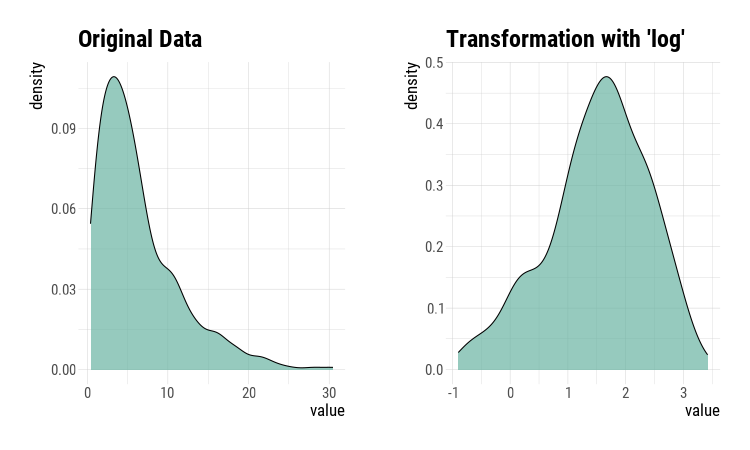

In [ ]:
%%R -w 750 -h 450 -u px
plot(soc_log)

## Binning of individual variables using `binning()`

`binning()` transforms a numeric variable into a categorical variable by binning it. The following types of binning are supported.

-   “quantile”: categorize using quantile to include the same frequencies

-   “equal”: categorize to have equal length segments

-   “pretty”: categorized into moderately good segments

-   “kmeans”: categorization using K-means clustering

-   “bclust”: categorization using bagged clustering technique

Here are some examples of how to bin `SOC` using `binning()`.:

In [ ]:
%%R
bin <- binning(mf$SOC)
# Print bins class object
bin

binned type: quantile
number of bins: 10
x
   [0.408,1.286467]   (1.286467,2.3232]   (2.3232,3.109267] (3.109267,3.988067] 
                 47                  46                  47                  47 
   (3.988067,4.971]      (4.971,6.1274]      (6.1274,7.507]      (7.507,10.076] 
                 47                  46                  47                  48 
  (10.076,13.42567]   (13.42567,30.473]                <NA> 
                 45                  47                   4 


In [ ]:
%%R
summary(bin)

                levels freq        rate
1     [0.408,1.286467]   47 0.099787686
2    (1.286467,2.3232]   46 0.097664544
3    (2.3232,3.109267]   47 0.099787686
4  (3.109267,3.988067]   47 0.099787686
5     (3.988067,4.971]   47 0.099787686
6       (4.971,6.1274]   46 0.097664544
7       (6.1274,7.507]   47 0.099787686
8       (7.507,10.076]   48 0.101910828
9    (10.076,13.42567]   45 0.095541401
10   (13.42567,30.473]   47 0.099787686
11                <NA>    4 0.008492569


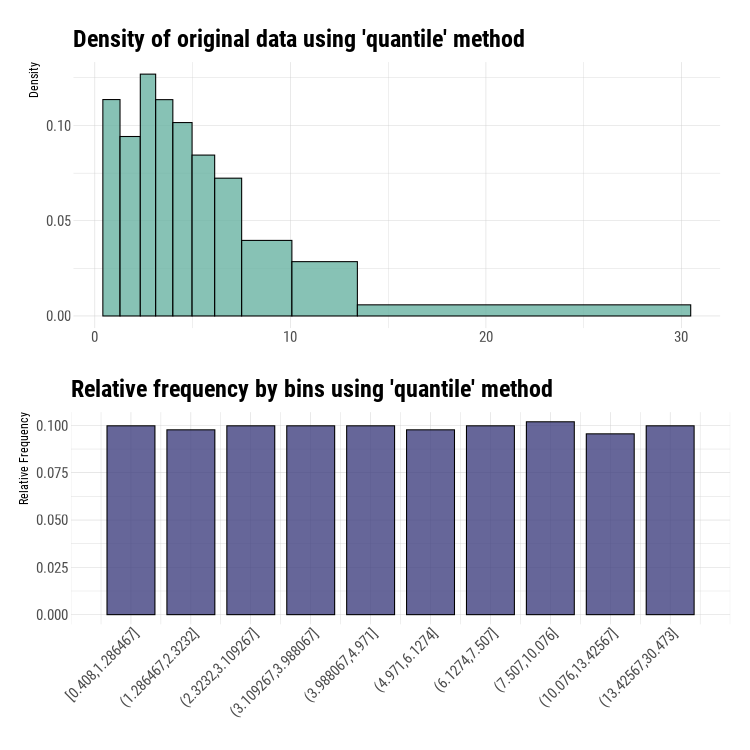

In [ ]:
%%R -w 750 -h 750 -u px
plot(bin)


## Summary and Conclusion

This tutorial explores exploratory data analysis (EDA) using the R-package 'dlookr.' You'll learn about the package's features, such as missing data analysis and outlier detection, and functions that facilitate the generation of insightful reports and visualizations. Additionally, you'll learn how 'dlookr' contributes to a comprehensive understanding of data quality. Remember to consider exploring its additional functionalities, practice with diverse datasets, and adapt the techniques to the unique characteristics of your data.

## References

1.  [dlook](https://github.com/choonghyunryu/dlookr)

2.  [Package dlookr](https://cran.r-project.org/web/packages/dlookr/dlookr.pdf)

3.  [R package reviews-dlookr](https://yuzar-blog.netlify.app/posts/2021-01-30-r-package-reviews-dlookr-diagnose-explore-and-transform-your-data/)